# Cat State Generator

This Qiskit code constructs a quantum circuit that generates a 20-bit "cat state". The name "cat state" is a reference to Schrödinger's cat, which is a famous thought experiment in quantum mechanics that illustrates the concepts of entanglement and the collapse of a system's wavefunction upon measurement.

In our "cat state", we will respresent the "alive" state as the all-zeros state and the "dead" state as the all-ones state:

$$|Cat\rangle = \frac{1}{\sqrt{2}}(|Alive\rangle + |Dead\rangle) = \frac{1}{\sqrt{2}}(|000\ldots0\rangle + |111\ldots1\rangle)$$

In the case of 20 qubits, this becomes:

$$|Cat\rangle = \frac{1}{\sqrt{2}}(|00000000000000000000\rangle + |11111111111111111111\rangle)$$

In Quantum Information Science, the formalism is to think of these "alive" and "dead" states as basis vectors of some vector space. In these terms, the state of the system is in a "linear combination" of the alive and dead states, not simply in "both" the alive and dead states. Measurement then can be viewed as a projection operator in this vector space that "collapses" our state into either the alive or dead state.

Below, we import functions that are used later in the notebook:

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

The following cell creates and draws the circuit in 4 major steps:

1. The QuantumCircuit command initializes a circuit. The Qiskit convention is that all qubits start out in the 0 state. Thus, the initial state of the system is simply the "alive" state:

$$|\psi\rangle = |00000000000000000000\rangle$$

2. In general, an H gate creates a 1-qubit cat state:

$$H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

We will start our circuit by performing an H gate on the top qubit in the circuit. The Qiskit convention is that the top qubit corresponds to the least significant bit, so the total state of the system becomes:

$$|\psi\rangle = \frac{1}{\sqrt{2}}(|00000000000000000000\rangle + |00000000000000000001\rangle)$$

3. The CX gate (pronounced "CNot") is responsible for producing entangled states. It requires 2 qubits as an input: a "control qubit" and a "target qubit". The effect of the CX gate is summarized as follows:

- if the control qubit is in the 0 state - do nothing
- if the control qubit is in the 1 state - flip the state of the target qubit

Of course, the control qubit itself can be in a superposition state. This is the power of the vector space formalism. If we represent the state of the quantum system as a linear combination of basis vectors that represent measurement outcomes, then the CX gate simply changes the basis vectors that correspond to the control qubit being in the state "1".

After performing one CX gate with the top qubit as the control qubit and the second qubit as the target qubit, the state of the system becomes:

$$|\psi\rangle = \frac{1}{\sqrt{2}}(|00000000000000000000\rangle + |00000000000000000011\rangle)$$

Applying more CX gates in the same fashion eventually puts our system in the cat state:

$$|\psi\rangle = |Cat\rangle = \frac{1}{\sqrt{2}}(|00000000000000000000\rangle + |11111111111111111111\rangle)$$

4. Finally, the circuit is measured. The result of a full measurement will be one of the basis vectors used to describe the state of the system. As we can see in the cat state, either all of the measurements will result in "0" or all of them will result in "1". The measurement gates write the output to a series of classical bits. In the circuit diagram, this is represented by the lines pointing to what is called the "classical register" at the bottom of the circuit diagram.

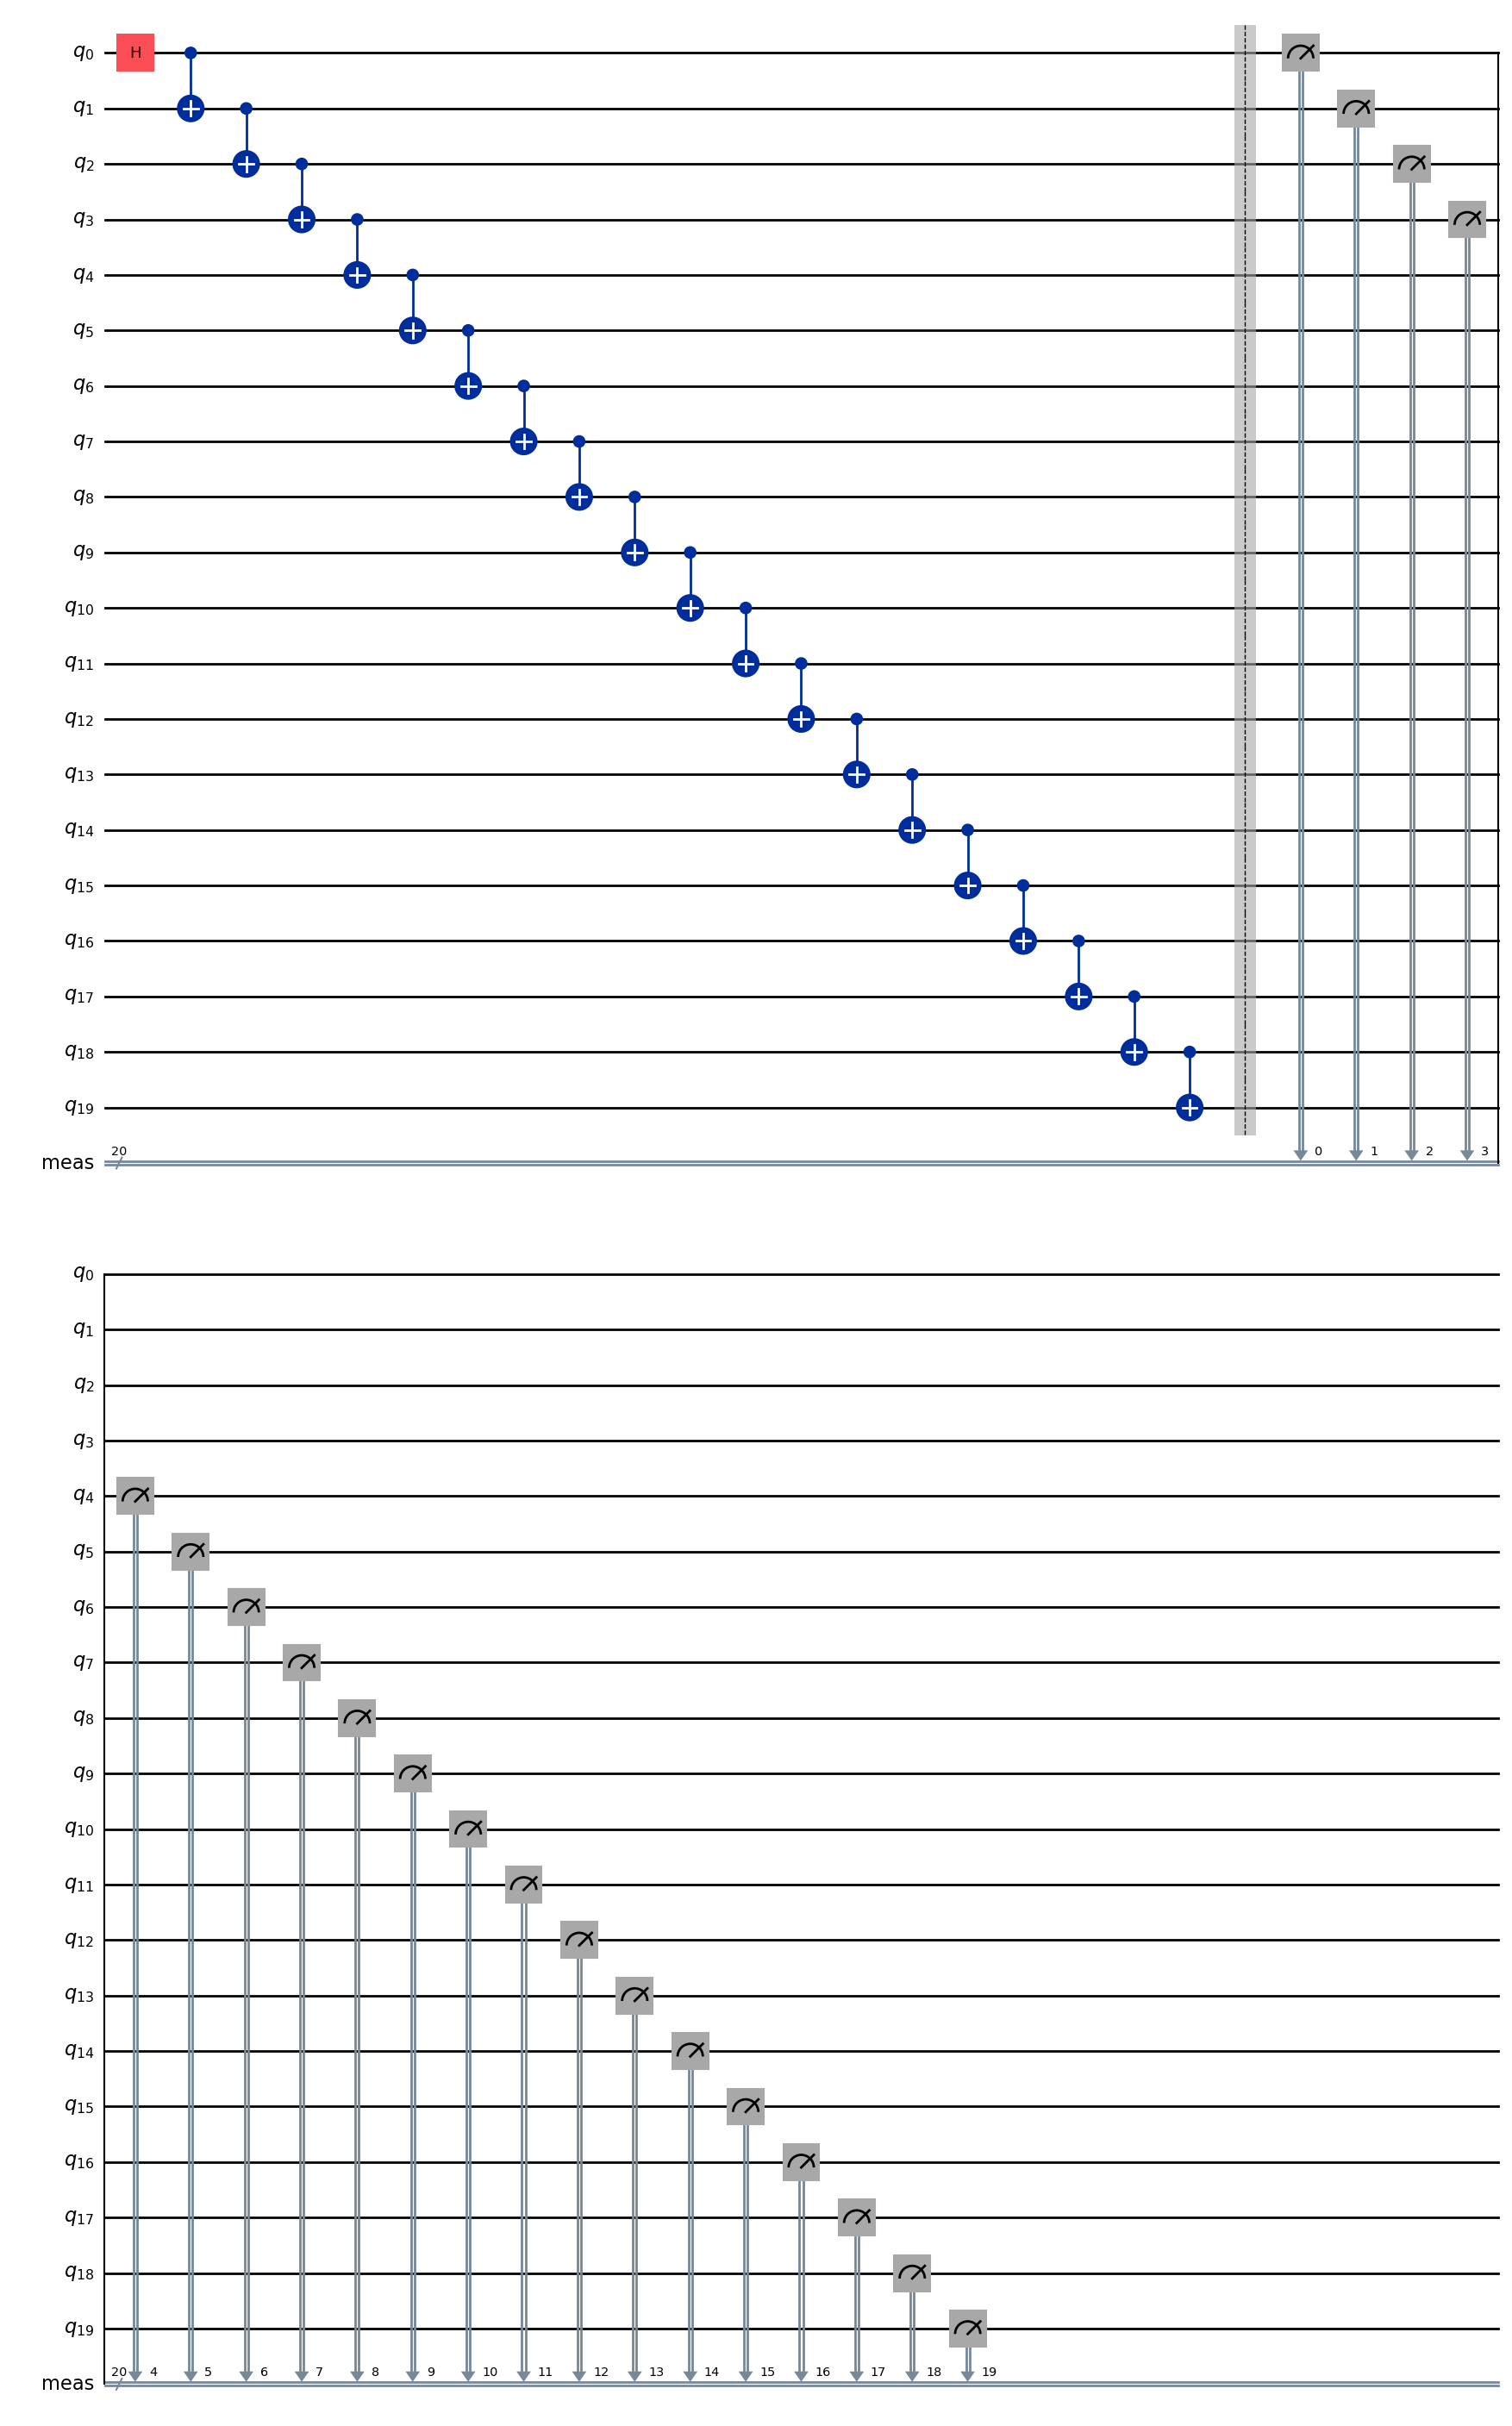

In [7]:
n = 20
circuit = QuantumCircuit(n) # Initializes a Circuit with n qubits

circuit.h(0) # Places the first Qubit in a superposition state

for i in range(n - 1):
    circuit.cx(i, i+1) # Entangles all of the qubits with the first one

circuit.measure_all()

circuit.draw(output="mpl")

Some things to note about the circuit above:

1. While there are 20 qubits in the circuit, Qiskit indeces start at 0, meaning that they are numbered from 0 to 19.

2. Before a quantum circuit is run on an actual quantum computer, it must be transpiled, which means the circuit is rewritten as a set of instructions that the quantum computer can execute. The purpose of the barrier inbetween the CX gates and the measurements is to tell the transpiler not to simplify anything in between these steps. Barriers can be added elsewhere in the code by using the circuit.barrier() command.

3. As mentioned previously, the measurement gates all point down to a line below the circuit. This line is called the classical register. The outcome of any measurement is either a 0 or a 1. The quantum computer will write this outcome as a classical bit in the classical register. The QuantumCircuit function is able to take a second argument that specifies the size of the classical register, but if no classical register was created, the measurement gates automatically create one.

The following code simulates the quantum circuit on a classical computer. Besides being more convenient for educational purposes, this is often a useful step for debugging circuits before sending them to run on the IBM quantum computers:

In [11]:
shots = 3000                            # number of times circuit is run
sim = AerSimulator()
job = sim.run(circuit, shots=shots)
result = job.result()


counts = result.get_counts(circuit)              # Display the results

print("Measurement results:")
for state, count in sorted(counts.items(), key=lambda x: -x[1]):
    percentage = (count / shots) * 100
    print(f"{state} : {count} ({percentage:.2f}%)")

Measurement results:
00000000000000000000 : 1504 (50.13%)
11111111111111111111 : 1496 (49.87%)


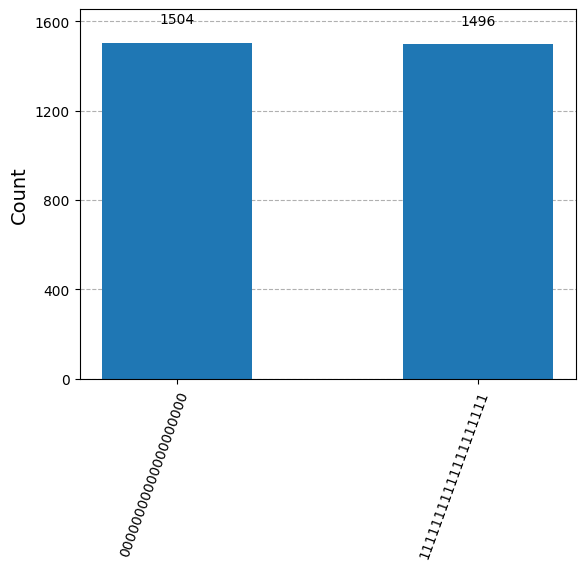

In [13]:
plot_histogram(counts)

Quantum computation entails running quantum circuits a large number of times and analyzing the distribution of the results. Notice that on any given execution of the code above, the split between measuring the "alive" and the "dead" states is not exactly 50-50 despite both outcomes being equally likely. However, evaluating the above two cells again will give a different distribution of results. If we had run the code with a higher shot count, we would have had less uncertainty in the resulting distribution, but it also would have taken longer to run on a real quantum computer.